# PCA Rundown 

Analysis largely taken from [this page](https://data.world/exercises/principal-components-exercise-1) and modified by David John Baker. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("nndb_flat.csv")

In [3]:
df

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
5,1006,Dairy and Egg Products,"CHEESE,BRIE","Cheese, brie",NaN,NaN,NaN,334.0,20.75,27.68,...,0.1625,0.023750,0.400000,0.058333,0.153333,0.000021,0.047619,0.268571,0.263636,0.216364
6,1007,Dairy and Egg Products,"CHEESE,CAMEMBERT","Cheese, camembert",NaN,NaN,NaN,300.0,19.80,24.26,...,0.1550,0.039375,0.375385,0.023333,0.323333,0.000023,0.047619,0.495714,0.263636,0.216364
7,1008,Dairy and Egg Products,"CHEESE,CARAWAY","Cheese, caraway",NaN,NaN,NaN,376.0,25.18,29.20,...,0.0450,0.011250,0.346154,0.025833,0.560833,0.000027,0.052381,0.700000,0.263636,0.267273
8,1009,Dairy and Egg Products,"CHEESE,CHEDDAR","Cheese, cheddar",NaN,NaN,NaN,406.0,24.04,33.82,...,0.0650,0.002437,0.333846,0.022500,0.562500,0.000062,0.064286,0.675714,0.514545,0.311818
9,1010,Dairy and Egg Products,"CHEESE,CHESHIRE","Cheese, cheshire",NaN,NaN,NaN,387.0,23.37,30.60,...,0.0450,0.005000,0.225385,0.038333,0.535833,0.000047,0.050000,0.662857,0.263636,0.253636


In [4]:
df.shape

(8618, 45)

In [5]:
df.columns

Index(['ID', 'FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName',
       'ScientificName', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g',
       'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg',
       'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg',
       'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg', 'VitA_USRDA', 'VitB6_USRDA',
       'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA',
       'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA',
       'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'],
      dtype='object')

There is a bit of redundant information here that we need to drop before we start doing any sort of analysis.

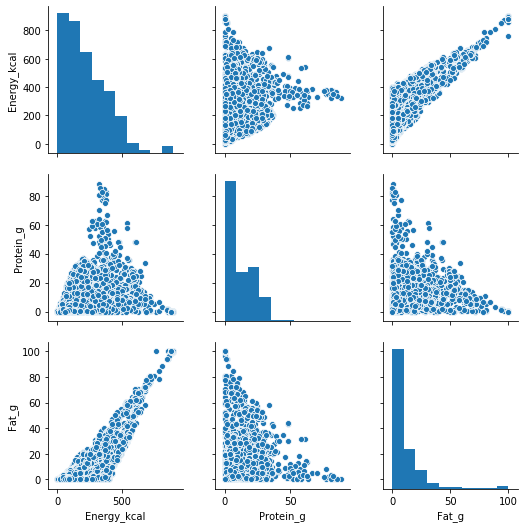

In [6]:
sns.pairplot(df[['Energy_kcal','Protein_g','Fat_g']])


In [7]:
df.drop(df.columns[df.columns.str.contains('_USRDA')].values, 
        inplace=True, axis=1)

In [8]:
df.set_index('ID', inplace=True)
df_desc = df.iloc[:, :6]
df.drop(df.columns[:6].values, axis=1, inplace=True)

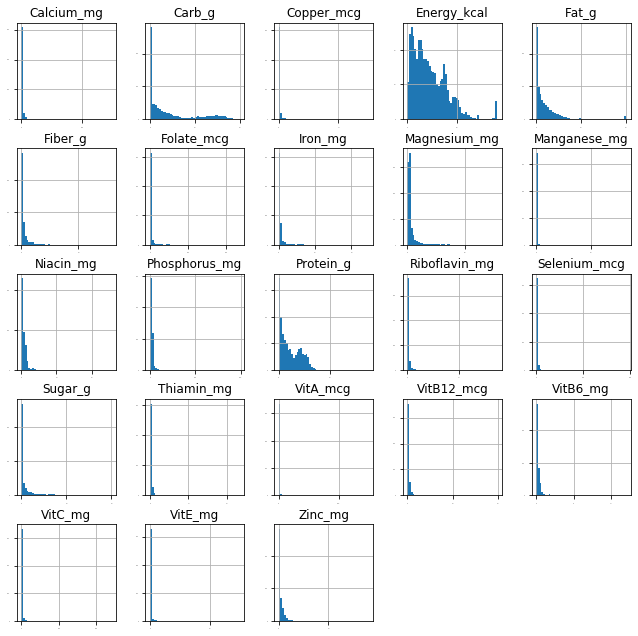

In [9]:
%matplotlib inline
ax = df.hist(bins=50, xlabelsize=-1, ylabelsize=-1, figsize=(11,11))

## Most of the variables are "zero" inflated and skewed right. We may want to consider transformation so "improve" the distributions and hopefully produce better correlations for our PCA. Note: this is an optional step that may not always improve results.

In [10]:
from scipy.stats import boxcox
# add 1 because data must be positive (we have many zeros)
df = df + 1
df_TF = pd.DataFrame(index=df.index)
for i in df.columns.values:
    df_TF["%s_TF" % i] = boxcox(df.loc[:, i])[0]

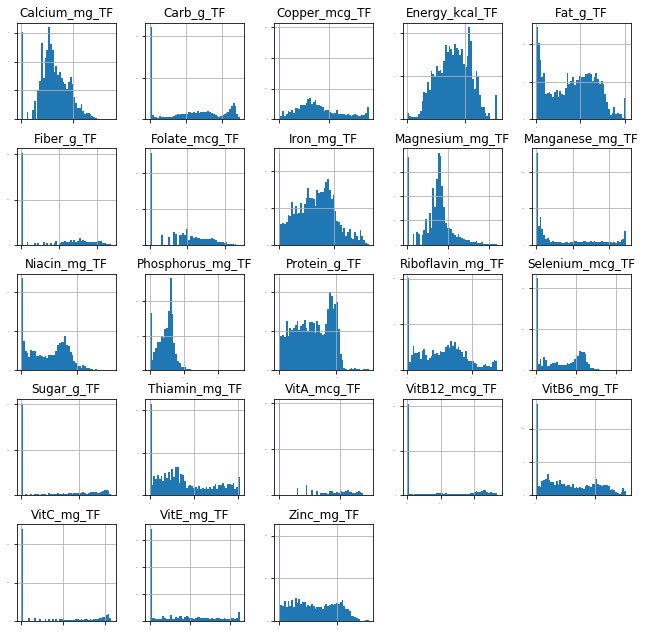

In [11]:
ax = df_TF.hist(bins=50, xlabelsize=-1, ylabelsize=-1, figsize=(11,11))

In [12]:
# from sklearn.preprocessing import StandardScaler
df_TF = StandardScaler().fit_transform(df_TF)

print("mean: ", np.round(df_TF.mean(), 2))
print("standard dev: ", np.round(df_TF.std(), 2))

mean:  -0.0
standard dev:  1.0


# Run PCA 

In [14]:
# from sklearn.decomposition import PCA
fit = PCA()
pca = fit.fit_transform(df_TF)
pca

array([[-2.63841405e+00, -1.70251243e+00,  1.28372455e+00, ...,
         1.20971410e-01, -1.93807148e-02, -9.00855602e-01],
       [-2.53793117e+00, -1.55046399e+00,  1.27981556e+00, ...,
         2.68506470e-01,  3.62586247e-03, -8.95689902e-01],
       [-3.75133548e+00, -2.08018975e+00,  2.06793169e+00, ...,
        -1.62701838e-01, -3.22116568e-02, -9.97154121e-01],
       ...,
       [-3.28860011e+00,  6.89373556e-01,  1.81022923e+00, ...,
         5.11991009e-01, -3.50434520e-01, -5.61815380e-01],
       [ 1.78153849e+00, -7.35900964e-01, -1.99994641e+00, ...,
         1.12915684e+00, -7.90341265e-01,  3.83494447e-01],
       [ 1.21057433e+00, -1.20474083e+00, -2.16951014e+00, ...,
         1.66433998e-01, -6.90435952e-01, -4.67142115e-01]])

Text(0, 0.5, 'Variance Explained')

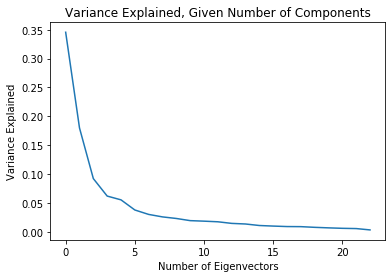

In [15]:
plt.plot(fit.explained_variance_ratio_)
plt.title("Variance Explained, Given Number of Components")
plt.xlabel("Number of Eigenvectors")
plt.ylabel("Variance Explained")

In [22]:
print(fit.explained_variance_ratio_)
print("--------------------")
print(fit.explained_variance_ratio_[:5].sum())
print("--------------------")
print("If we use ALL the data we can explain",fit.explained_variance_ratio_[:23].sum()*100," % of our data!")

[0.34554936 0.17971019 0.09201387 0.06176452 0.05520037 0.03764111
 0.02996247 0.02566808 0.02294417 0.0192006  0.01828886 0.01721459
 0.01443828 0.01337614 0.0107629  0.00977106 0.00894584 0.00878398
 0.00760274 0.00668982 0.00589323 0.00545379 0.00312402]
--------------------
0.7342383069412223
--------------------
If we use ALL the data we can explain 100.0  % of our data!


#### the first 5 eigenvectors account for 77% of the variance and will be kept

In [23]:
display(pca)

,0,1,2,3,4
ID,,,,,
1001,-2.638414,-1.702512,1.283725,3.759546,-2.413650
1002,-2.537931,-1.550464,1.279816,3.634065,-2.492683
1003,-3.751335,-2.080190,2.067932,3.668154,-2.457203
1004,2.000578,-1.361858,-0.395834,2.432792,-0.887796
1005,1.582713,-1.321484,-0.238444,2.597599,-1.286317
1006,1.863204,-1.574957,-0.439887,2.294839,-0.520449
1007,1.891225,-1.520336,-0.746761,2.326153,-0.711949
1008,1.606994,-1.268053,-0.116104,1.496801,-1.152146
1009,1.975289,-1.227981,-0.441797,3.005544,-2.078664


In [24]:
pca = pd.DataFrame(pca[:, :5], index=df.index)
pca

TypeError: '(slice(None, None, None), slice(None, 5, None))' is an invalid key

In [26]:
df_desc

,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName
ID,,,,,,
1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN
1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN
1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN
1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN
1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN
1006,Dairy and Egg Products,"CHEESE,BRIE","Cheese, brie",NaN,NaN,NaN
1007,Dairy and Egg Products,"CHEESE,CAMEMBERT","Cheese, camembert",NaN,NaN,NaN
1008,Dairy and Egg Products,"CHEESE,CARAWAY","Cheese, caraway",NaN,NaN,NaN
1009,Dairy and Egg Products,"CHEESE,CHEDDAR","Cheese, cheddar",NaN,NaN,NaN


In [27]:
pca = pca.join(df_desc)


In [28]:
pca.drop(['CommonName','MfgName','ScientificName'], axis=1, inplace=True)
pca.rename(columns={0:'c1',1:'c2',2:'c3',3:'c4',4:'c5'}, inplace=True)

In [29]:
pca

,c1,c2,c3,c4,c5,FoodGroup,ShortDescrip,Descrip
ID,,,,,,,,
1001,-2.638414,-1.702512,1.283725,3.759546,-2.413650,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted"
1002,-2.537931,-1.550464,1.279816,3.634065,-2.492683,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt"
1003,-3.751335,-2.080190,2.067932,3.668154,-2.457203,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous"
1004,2.000578,-1.361858,-0.395834,2.432792,-0.887796,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue"
1005,1.582713,-1.321484,-0.238444,2.597599,-1.286317,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick"
1006,1.863204,-1.574957,-0.439887,2.294839,-0.520449,Dairy and Egg Products,"CHEESE,BRIE","Cheese, brie"
1007,1.891225,-1.520336,-0.746761,2.326153,-0.711949,Dairy and Egg Products,"CHEESE,CAMEMBERT","Cheese, camembert"
1008,1.606994,-1.268053,-0.116104,1.496801,-1.152146,Dairy and Egg Products,"CHEESE,CARAWAY","Cheese, caraway"
1009,1.975289,-1.227981,-0.441797,3.005544,-2.078664,Dairy and Egg Products,"CHEESE,CHEDDAR","Cheese, cheddar"


## Try to interpret the components

(this is where deep subject matter expertise, in this case nutrition, comes in handy)

**Component one** 

foods that are high in: zinc, and other vitamins and minerals

low in: sugar, vitamin C, Carbs, and fiber

In [31]:
# Get First Five Columns
vects = fit.components_[:5]

In [32]:
one = pd.Series(vects[0], index=df.columns)
one.sort_values(ascending=False)

Zinc_mg          0.308506
Phosphorus_mg    0.305000
Niacin_mg        0.294094
Protein_g        0.286086
Riboflavin_mg    0.282687
VitB6_mg         0.270646
Selenium_mcg     0.264114
Iron_mg          0.262314
Magnesium_mg     0.260245
Thiamin_mg       0.235440
VitB12_mcg       0.221322
Copper_mcg       0.220232
Folate_mcg       0.167856
Energy_kcal      0.165126
Fat_g            0.161488
Calcium_mg       0.135512
VitE_mg          0.090808
Manganese_mg     0.088762
VitA_mcg         0.056996
Fiber_g         -0.004663
Carb_g          -0.033767
VitC_mg         -0.069830
Sugar_g         -0.076132
dtype: float64

**Component two**

High: Carbs, Fiber, Mang, Sugar, Vitamin C...

Low: Vitamine B12, protein, selenium, Fat...

In [43]:
two = pd.Series(vects[1], index=df.columns)
two.sort_values(ascending=True)

VitB12_mcg      -0.265671
Protein_g       -0.196127
Selenium_mcg    -0.138883
Fat_g           -0.123575
Zinc_mg         -0.100529
Niacin_mg       -0.064197
VitB6_mg        -0.052166
Phosphorus_mg   -0.001517
Riboflavin_mg    0.024240
Energy_kcal      0.041850
VitA_mcg         0.095701
VitE_mg          0.104310
Iron_mg          0.118917
Thiamin_mg       0.159641
Copper_mcg       0.181631
Magnesium_mg     0.199838
Calcium_mg       0.231052
Folate_mcg       0.238391
VitC_mg          0.242314
Sugar_g          0.295640
Manganese_mg     0.343603
Fiber_g          0.397832
Carb_g           0.414542
dtype: float64

**Component three**

High: calories, fat, carbs, sugar...

Low: vitamin A, vitamin C, folate, copper...

In [34]:
three = pd.Series(vects[2], index=df.columns)
three.sort_values(ascending=False)

Energy_kcal      0.508062
Fat_g            0.409505
Carb_g           0.250952
Sugar_g          0.208651
Thiamin_mg       0.191124
Fiber_g          0.153640
Iron_mg          0.115065
Riboflavin_mg    0.062074
Niacin_mg        0.055991
Protein_g        0.026828
Phosphorus_mg   -0.010948
VitE_mg         -0.012473
Zinc_mg         -0.051002
Magnesium_mg    -0.100792
VitB12_mcg      -0.107476
Manganese_mg    -0.108755
VitB6_mg        -0.121850
Calcium_mg      -0.125621
Selenium_mcg    -0.131798
Copper_mcg      -0.177702
Folate_mcg      -0.264298
VitA_mcg        -0.298089
VitC_mg         -0.334490
dtype: float64

**Component four**

High: vitamin A, vitamin E, fat, sugar, calcium, vitamin B12, calories...

Low: manganese, copper, iron, magnesium, fiber

In [35]:
four = pd.Series(vects[3], index=df.columns)
four.sort_values(ascending=False)

VitA_mcg         0.539792
VitE_mg          0.537710
Fat_g            0.282774
Sugar_g          0.279657
Calcium_mg       0.188343
VitB12_mcg       0.167068
Energy_kcal      0.158787
VitC_mg          0.129288
Selenium_mcg     0.063452
Riboflavin_mg    0.061855
Folate_mcg       0.011655
VitB6_mg        -0.011382
Phosphorus_mg   -0.022623
Carb_g          -0.025185
Zinc_mg         -0.055472
Niacin_mg       -0.065223
Thiamin_mg      -0.086530
Protein_g       -0.090944
Fiber_g         -0.119122
Magnesium_mg    -0.131683
Iron_mg         -0.149698
Copper_mcg      -0.167872
Manganese_mg    -0.203804
dtype: float64

** Component five**

High: riboflavin, thiamin, niacin, sugar, vitB6, vitC, vitB12...

Low: manganese, copper, fat, vitE, calories, magnesium

In [36]:
five = pd.Series(vects[4], index=df.columns)
five.sort_values(ascending=False)

Riboflavin_mg    0.322545
Thiamin_mg       0.281944
Niacin_mg        0.264423
Sugar_g          0.264262
VitB6_mg         0.254663
VitC_mg          0.249634
VitB12_mcg       0.195637
Iron_mg          0.158585
Carb_g           0.101396
Fiber_g          0.075900
VitA_mcg         0.057928
Zinc_mg         -0.029074
Calcium_mg      -0.035398
Protein_g       -0.046148
Phosphorus_mg   -0.084178
Folate_mcg      -0.105000
Magnesium_mg    -0.143789
Selenium_mcg    -0.163561
Energy_kcal     -0.204336
VitE_mg         -0.250605
Fat_g           -0.266740
Copper_mcg      -0.316998
Manganese_mg    -0.347515
dtype: float64

In [37]:
## Now let's look at which food groups are highest in each component (1)

In [38]:
pca

,c1,c2,c3,c4,c5,FoodGroup,ShortDescrip,Descrip
ID,,,,,,,,
1001,-2.638414,-1.702512,1.283725,3.759546,-2.413650,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted"
1002,-2.537931,-1.550464,1.279816,3.634065,-2.492683,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt"
1003,-3.751335,-2.080190,2.067932,3.668154,-2.457203,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous"
1004,2.000578,-1.361858,-0.395834,2.432792,-0.887796,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue"
1005,1.582713,-1.321484,-0.238444,2.597599,-1.286317,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick"
1006,1.863204,-1.574957,-0.439887,2.294839,-0.520449,Dairy and Egg Products,"CHEESE,BRIE","Cheese, brie"
1007,1.891225,-1.520336,-0.746761,2.326153,-0.711949,Dairy and Egg Products,"CHEESE,CAMEMBERT","Cheese, camembert"
1008,1.606994,-1.268053,-0.116104,1.496801,-1.152146,Dairy and Egg Products,"CHEESE,CARAWAY","Cheese, caraway"
1009,1.975289,-1.227981,-0.441797,3.005544,-2.078664,Dairy and Egg Products,"CHEESE,CHEDDAR","Cheese, cheddar"


In [40]:
pca.sort_values(by='c1')['FoodGroup'][:500].value_counts()

Soups, Sauces, and Gravies             190
Beverages                              167
Sweets                                  45
Vegetables and Vegetable Products       20
Legumes and Legume Products             16
Fruits and Fruit Juices                 16
Baby Foods                              10
Meals, Entrees, and Side Dishes          9
Spices and Herbs                         7
Fats and Oils                            7
American Indian/Alaska Native Foods      5
Snacks                                   3
Baked Products                           2
Fast Foods                               2
Sausages and Luncheon Meats              1
Name: FoodGroup, dtype: int64

In [44]:
pca.sort_values(by='c2')['FoodGroup'][:500].value_counts()

Beef Products                          353
Lamb, Veal, and Game Products           71
Poultry Products                        21
American Indian/Alaska Native Foods     13
Fats and Oils                           13
Pork Products                            9
Finfish and Shellfish Products           8
Sausages and Luncheon Meats              4
Restaurant Foods                         3
Fast Foods                               3
Beverages                                2
Name: FoodGroup, dtype: int64

In [45]:
pca.sort_values(by='c3')['FoodGroup'][:500].value_counts()

Vegetables and Vegetable Products      344
Finfish and Shellfish Products          68
Poultry Products                        19
Beverages                               10
Soups, Sauces, and Gravies              10
Fruits and Fruit Juices                  9
Lamb, Veal, and Game Products            9
Baby Foods                               7
Spices and Herbs                         6
Fast Foods                               5
Beef Products                            4
Pork Products                            4
American Indian/Alaska Native Foods      2
Nut and Seed Products                    2
Dairy and Egg Products                   1
Name: FoodGroup, dtype: int64

In [46]:
pca.sort_values(by='c4')['FoodGroup'][:500].value_counts()

Legumes and Legume Products            124
Cereal Grains and Pasta                 98
Vegetables and Vegetable Products       89
Baked Products                          39
Nut and Seed Products                   34
Breakfast Cereals                       23
Snacks                                  19
American Indian/Alaska Native Foods     18
Beverages                               16
Sweets                                  15
Sausages and Luncheon Meats              6
Lamb, Veal, and Game Products            6
Spices and Herbs                         5
Fruits and Fruit Juices                  2
Soups, Sauces, and Gravies               2
Finfish and Shellfish Products           2
Baby Foods                               1
Poultry Products                         1
Name: FoodGroup, dtype: int64

In [47]:
pca.sort_values(by='c5')['FoodGroup'][:500].value_counts()

Fats and Oils                          145
Nut and Seed Products                   81
Sweets                                  51
Legumes and Legume Products             50
Snacks                                  41
Baked Products                          24
Sausages and Luncheon Meats             17
American Indian/Alaska Native Foods     16
Dairy and Egg Products                  13
Cereal Grains and Pasta                 12
Finfish and Shellfish Products          12
Breakfast Cereals                        8
Fast Foods                               5
Restaurant Foods                         4
Spices and Herbs                         4
Beverages                                3
Beef Products                            3
Poultry Products                         3
Lamb, Veal, and Game Products            2
Pork Products                            2
Vegetables and Vegetable Products        1
Soups, Sauces, and Gravies               1
Baby Foods                               1
Fruits and 

# What About Other Ways?

In [48]:
# from sklearn.decomposition import PCA
fit_2 = PCA(n_components=2)
pca_2 = fit_2.fit_transform(df_TF)
pca_2

fit_7 = PCA(n_components=7)
pca_7 = fit_7.fit_transform(df_TF)
pca_7

array([[-2.63841402, -1.70251224,  1.28372613, ..., -2.41367978,
         0.02732389,  1.50366109],
       [-2.53793113, -1.55046394,  1.2798093 , ..., -2.49268629,
        -0.02134181,  1.56049882],
       [-3.75133546, -2.08018999,  2.06791689, ..., -2.45719608,
        -0.82161504,  1.98161173],
       ...,
       [-3.28859999,  0.68937774,  1.81036264, ...,  1.13796119,
         0.53119934, -0.63482102],
       [ 1.78153856, -0.7358979 , -1.99983968, ..., -1.79683397,
        -0.68621884, -1.32093724],
       [ 1.21057443, -1.20474541, -2.16970525, ..., -0.65315261,
         0.66206662, -0.56112687]])

In [49]:
# Create a new dataset from principal components 
df = pd.DataFrame(data = pca_2, 
                  columns = ['PC1', 'PC2'])


df_7 = pd.DataFrame(data = pca_7, 
                  columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7'])

# target = pd.Series(iris['target'], name='target')

# result_df = pd.concat([df, target], axis=1)
# result_df.head(5)

In [50]:
df_desc = pd.DataFrame(df_desc)
food_2 = df.join(df_desc)

display(food_2)

food_7 = df_7.join(df_desc)

#display(food_7)


,PC1,PC2,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName
0,-2.638414,-1.702512,NaN,NaN,NaN,NaN,NaN,NaN
1,-2.537931,-1.550464,NaN,NaN,NaN,NaN,NaN,NaN
2,-3.751335,-2.080190,NaN,NaN,NaN,NaN,NaN,NaN
3,2.000578,-1.361858,NaN,NaN,NaN,NaN,NaN,NaN
4,1.582713,-1.321484,NaN,NaN,NaN,NaN,NaN,NaN
5,1.863204,-1.574957,NaN,NaN,NaN,NaN,NaN,NaN
6,1.891225,-1.520336,NaN,NaN,NaN,NaN,NaN,NaN
7,1.606994,-1.268053,NaN,NaN,NaN,NaN,NaN,NaN
8,1.975289,-1.227981,NaN,NaN,NaN,NaN,NaN,NaN
9,1.456045,-1.426216,NaN,NaN,NaN,NaN,NaN,NaN


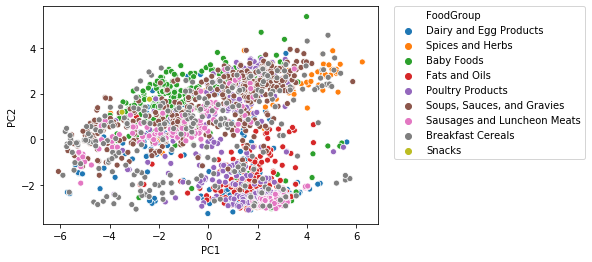

In [62]:
sns.scatterplot("PC1", "PC2", hue = "FoodGroup", data = food_7)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [52]:

food_example = food[['FoodGroup','PC1','PC2']].dropna()

little_food = food_example.sample(50)

sns.scatterplot("PC1", "PC2", hue = "FoodGroup", data = little_food)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Food Groups with ONLY 2 Components")


NameError: name 'food' is not defined